In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Markdown
import numpy as np

In [2]:
# Load data
with open('psy_data.csv', 'r', encoding='utf-8') as f:
    # dogs = pd.read_excel(f, sheet_name='Dataset', header=0)
    dogs = pd.read_csv(f, header=0, index_col=0)


# Čo spôsobuje agresivitu u psov, respektíve aké sú znaky agresívnych psov ?
(Sem píšte všetky možné nápady a ich výsledky. Odporúčám písať obyčajné .py scripty a potom ich len importnete (nie from ... import *) v príslušnej code bunke, alebo píšte kód tak, aby neprepisoval premenne inych, rozhodne nie premennu dogs, mozete pouzit funkcie)

## Agresivita v závislosti od plemena

In [3]:
aggressive_columns = ['Aggressive_dogs_samegender', 'Aggressive_people', 'Aggressive_dogs_oppositegender', 'aggressiveness_dominance_score']

means = dogs.groupby('breed_group')[aggressive_columns].mean().reset_index()
means['Aggressive_columns_sum'] = means[aggressive_columns[0]] + means[aggressive_columns[1]] + means[aggressive_columns[2]]
means.sort_values(by='Aggressive_columns_sum', inplace=True)
fig = px.bar(means, y='breed_group', x=aggressive_columns[:-1])

fig.show()

Ako sme mohli predpokladať, tak bojové plemená majú najväčšiu agresivitu, zaujímavé je (aspoň pre mňa), že nemecký ovčiak berie 2. miesto

### Porovnanie znakov psov patriacich do plemien Fighting_breeds vs Larador_Retriever. V akých znakoch sa značne odlišujú ?

## Vply socializácie psa na jeho agresivitu
(predpoklad: menšia socializácia, väčšia agresivita)

In [4]:

soc = dogs[['socialization', 'aggressiveness_dominance_score']]
# soc['aggressivness'] = dogs[aggressive_columns[0]] + dogs[aggressive_columns[1]] + dogs[aggressive_columns[2]]
soc = soc.sort_values(by='socialization').dropna()
soc = soc.rolling(200).mean()
fig = px.line(data_frame=soc, x='socialization', y='aggressiveness_dominance_score')
fig.show()

So zvysujucou socializaciou trochu klesa agresivita.

### Agresivita voci ludom

#### Pri socializacii
* ludmi
* detmi
* v meste
* verejnou dopravou
* psom

##### Socializacia dietatom pri malom veku
Hypoteza: zla skusenost v malom veku pri socializacii dietatom zanecha zlu skusenost

In [6]:
# fig, axe = plt.subplots(2,2, figsize=(15,10))
# for i,x in enumerate(['Socialization_people', 'Socialization_dogs', 'Socialization_city', 'Socialization_public.transportation']):
#     ax = sns.boxplot(A, x=x, y='stranger_aggression_score', ax=axe[i//2,i%2])
#     ax.set_title(x)
#     ax.set_xlabel("")

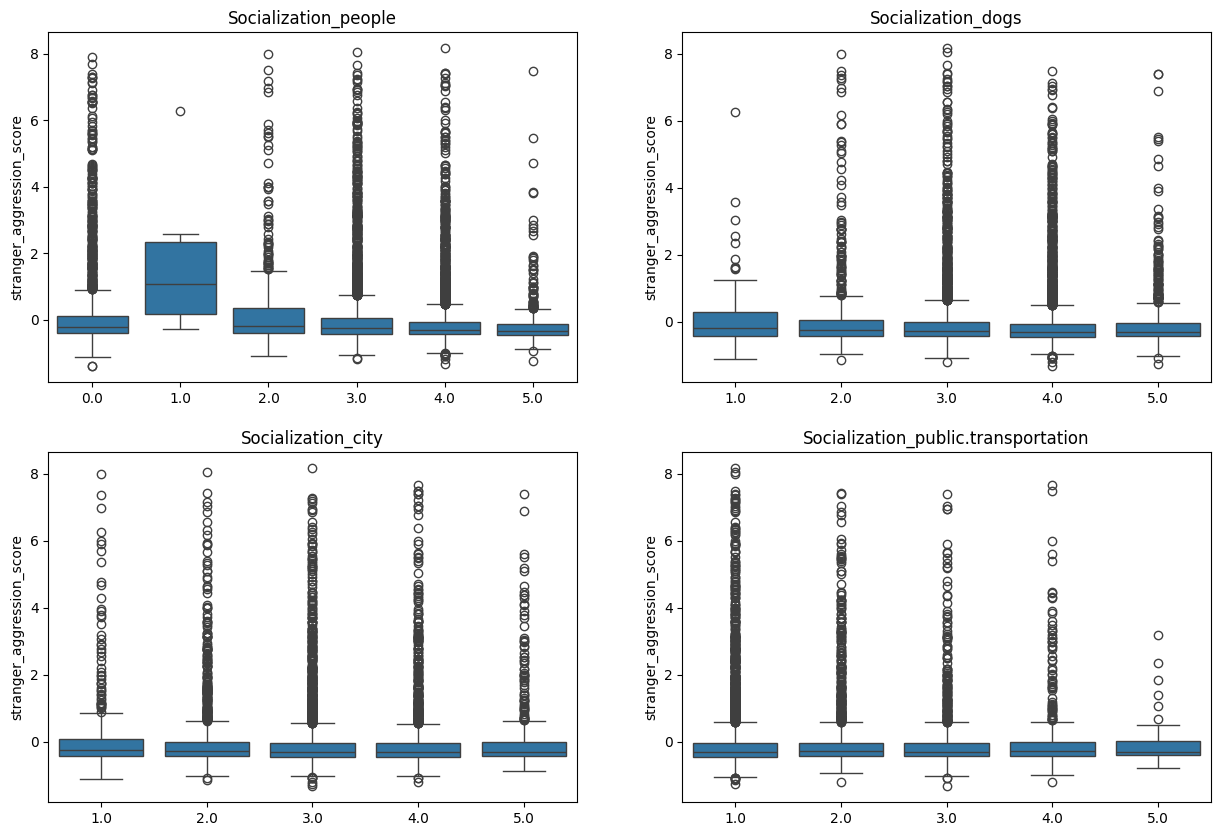

In [7]:
A = dogs.copy()
A['Socialization_people'] = (dogs[['Socialization_men', 'Socialization_women', 'Socialization_children']].sum(axis=1) / 3).apply('round')
# A['Socialization_urban'] = (dogs[['Socialization_city', 'Socialization_public.transportation']].sum(axis=1) / 2).apply('round')
# A['Socialization_public.transportation']
fig, axe = plt.subplots(2,2, figsize=(15,10))
for i,x in enumerate(['Socialization_people', 'Socialization_dogs', 'Socialization_city', 'Socialization_public.transportation']):
    ax = sns.boxplot(A, x=x, y='stranger_aggression_score', ax=axe[i//2,i%2])
    ax.set_title(x)
    ax.set_xlabel("")

### Agresivita voci psom

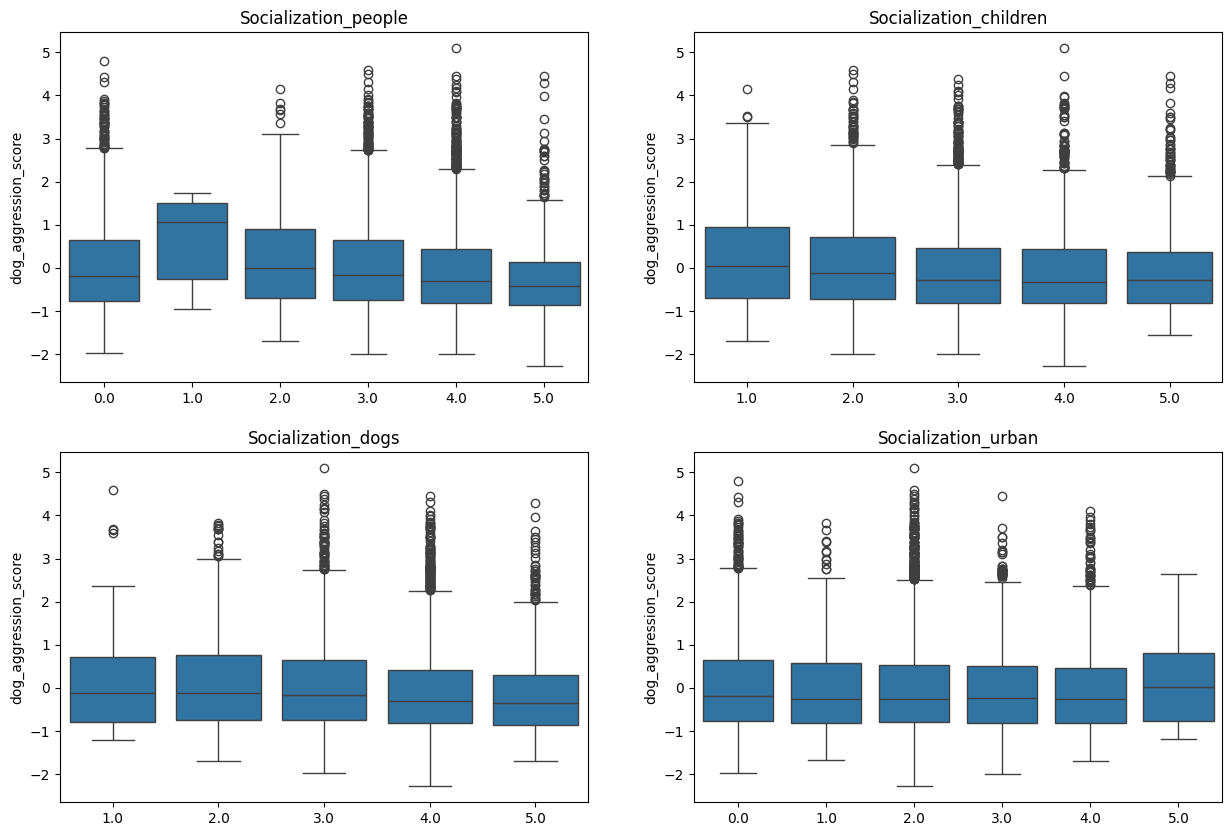

In [8]:
A = dogs.copy()
A['Socialization_people'] = (dogs[['Socialization_men', 'Socialization_women', 'Socialization_children']].sum(axis=1) / 3).apply('round')
A['Socialization_urban'] = (dogs[['Socialization_city', 'Socialization_public.transportation']].sum(axis=1) / 2).apply('round')

fig, axe = plt.subplots(2,2, figsize=(15,10))
for i,x in enumerate(['Socialization_people', 'Socialization_children', 'Socialization_dogs', 'Socialization_urban']):
    ax = sns.boxplot(A, x=x, y='dog_aggression_score', ax=axe[i//2,i%2])
    ax.set_title(x)
    ax.set_xlabel("")

## Váha u psov a ich agresivita
noro sem to mozes vlepit

## Boja sa agresívne psy viac ?

### Strach od ludi

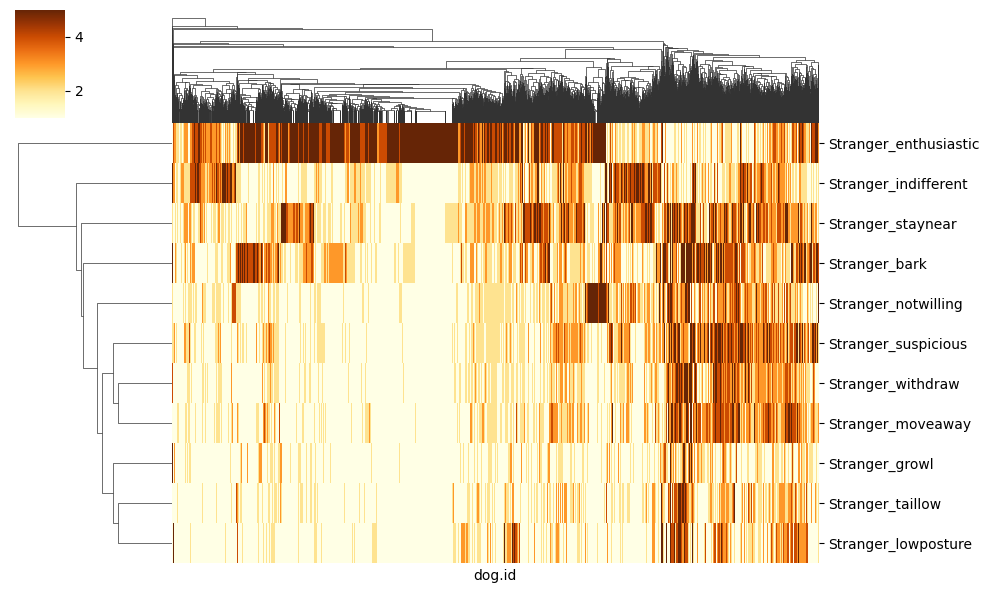

In [9]:
STRANGER_PHOBIAS = ['Stranger_withdraw',
 'Stranger_bark',
 'Stranger_growl',
 'Stranger_taillow',
 'Stranger_staynear',
 'Stranger_notwilling',
 'Stranger_enthusiastic',
 'Stranger_indifferent',
 'Stranger_lowposture',
 'Stranger_moveaway',
 'Stranger_suspicious']

dogs_vs_strangers = dogs[STRANGER_PHOBIAS].dropna().transpose()
sns.clustermap(dogs_vs_strangers, xticklabels=False, cmap='YlOrBr', figsize=(10,6))


1. pes bude pravdepodobne vrcat, ked ma chvost medzi nohami a je skrceny
2. stranger moveaway / withdraw / suspicious su velmi podobne, a asi aj preto to tak ludia v dotaznikoch vyplnili
3. pes steka, ked je notwilling a suspicious
4. pes ak je pes stranger enthusiastic, tak vsetky ostatne su nizke
5. ak pes steka na cudzich, tak aj je pravdepodobne, ze bude moveaway, notwilling, suspicious

### Fear Stranger

In [10]:
display(dogs.groupby('fear_stranger')['stranger_aggression_score'].describe())
display(Markdown('**Ak sa pes boji cudzich ludi, tak je vacsia sanca, ze je agresivnejsi**'))

,count,mean,std,min,25%,50%,75%,max
fear_stranger,,,,,,,,
0.0,9099.0,-0.183262,0.629107,-1.398677,-0.458855,-0.333278,-0.127100,7.671161
1.0,1858.0,0.775795,1.668156,-1.408906,-0.196723,0.088192,0.960956,8.162408


**Ak sa pes boji cudzich ludi, tak je vacsia sanca, ze je agresivnejsi**

C:\Users\darkk\AppData\Local\Temp\ipykernel_8316\583718472.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\darkk\AppData\Local\Temp\ipykernel_8316\583718472.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



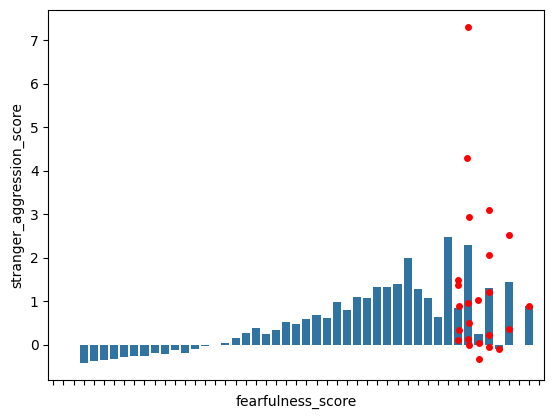

In [11]:
px.scatter(dogs, x='fearfulness_score', y='stranger_aggression_score').show()

A = pd.concat([dogs, pd.cut(dogs['fearfulness_score'], np.linspace(-2, 5, 50)).rename('interval')], axis=1)

B = A.groupby('interval')['stranger_aggression_score'].mean()
axe = sns.barplot(B)

C = pd.concat([A, A.groupby('interval')['stranger_aggression_score'].transform('count').rename('CCC')], axis=1)
axe = sns.stripplot(C.loc[C['CCC'] < 10], x='interval', y='stranger_aggression_score', color='red', ax=axe)
axe.set_xticklabels('')
axe.set_xlabel('fearfulness_score')
pass

## Je väčšia pravdepodobnosť, že pes je agresívnejší, ak nie je od chovateľa ?

**Priemerna agresivita:**

obtained_from
born_home         -0.099612
breeder           -0.009606
rescue_previous    0.206838
Name: aggressiveness_dominance_score, dtype: float64

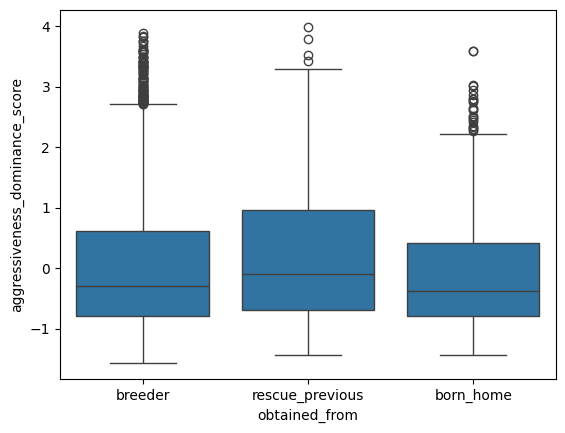

In [12]:
# px.bar(dogs.groupby('obtained_from')['aggressivness_score'])
sns.boxplot(dogs, x='obtained_from', y='aggressiveness_dominance_score')
display(Markdown('**Priemerna agresivita:**'))
display(dogs.groupby('obtained_from')['aggressiveness_dominance_score'].mean())

vyzera, ze zachranene psy su o trosku agresivnejsie.

### Aku maju agresivitu voci ludom

In [13]:
A = dogs.groupby(['obtained_from', 'Aggressive_people'])['Aggressive_people'].count().rename('count').reset_index()
A['count'] = A['count'] / A.groupby('obtained_from')['count'].transform('sum') * 100
B = A.pivot(columns='Aggressive_people', values='count', index='obtained_from')
C = B.transpose()
px.imshow(C).show()

Zaujimave je, ze takmer nikto nehlasoval za agresivitu 3, vzdy to je bud 1, 2 alebo 4 

## Vplyv casu osamote 

In [14]:
display(dogs.groupby('alone_time')['stranger_aggression_score'].describe())
display(Markdown('**Rozdiely v aggression score su velmi male a tak asi nezavisi cas osamote od agresivity**'))

,count,mean,std,min,25%,50%,75%,max
alone_time,,,,,,,,
1-3_hours,1853.0,0.001876,1.012276,-1.198739,-0.439443,-0.291067,-0.000977,8.162408
3-6_hours,3036.0,-0.023753,0.935618,-1.333412,-0.438883,-0.283301,-0.017045,8.059423
6-8_hours,3075.0,-0.026761,0.916072,-1.398677,-0.441906,-0.294864,-0.022551,7.479161
over_8_hours,2128.0,-0.021358,0.983679,-1.408906,-0.448921,-0.291258,-0.029123,7.425421
under_1_hour,1306.0,0.096317,1.149312,-1.260334,-0.420503,-0.258560,0.049952,7.994157


**Rozdiely v aggression score su velmi male a tak asi nezavisi cas osamote od agresivity**

## Separation anxiety vs strangers aggresivity score

C:\Users\darkk\AppData\Local\Temp\ipykernel_8316\35873710.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\darkk\AppData\Local\Temp\ipykernel_8316\35873710.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



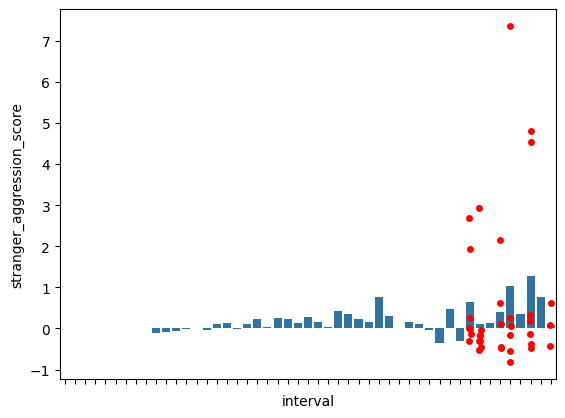

In [15]:
px.scatter(dogs, x='separation_behavior_score', y='stranger_aggression_score').show()

A = pd.concat([dogs, pd.cut(dogs['separation_behavior_score'], np.linspace(-2, 5, 50)).rename('interval')], axis=1)

B = A.groupby('interval')['stranger_aggression_score'].mean()
axe = sns.barplot(B)

C = pd.concat([A, A.groupby('interval')['stranger_aggression_score'].transform('count').rename('CCC')], axis=1)
axe = sns.stripplot(C.loc[C['CCC'] < 10], x='interval', y='stranger_aggression_score', color='red', ax=axe)
axe.set_xticklabels('')
pass

Vyzera, ze sepration anxiety neovplyvnuje agresivitu psov, preto ju viacej z hladiska agresivity nebudem analyzovat.

## Impulsivity/Inattetion vs Stranger aggression

### Impulsivity

C:\Users\darkk\AppData\Local\Temp\ipykernel_8316\1505140824.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\darkk\AppData\Local\Temp\ipykernel_8316\1505140824.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



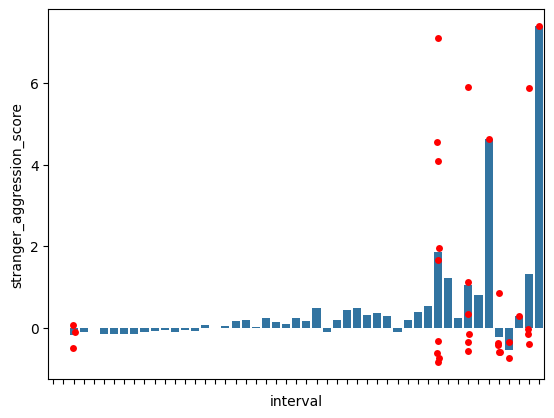

In [16]:
# display(dogs.groupby('impulsivity_score')['stranger_aggression_score'].mean())
px.scatter(dogs, x='impulsivity_score', y='stranger_aggression_score').show()

A = pd.concat([dogs, pd.cut(dogs['impulsivity_score'], np.linspace(-2, 5, 50)).rename('interval')], axis=1)

B = A.groupby('interval')['stranger_aggression_score'].mean()
axe = sns.barplot(B)

C = pd.concat([A, A.groupby('interval')['stranger_aggression_score'].transform('count').rename('CCC')], axis=1)
axe = sns.stripplot(C.loc[C['CCC'] < 10], x='interval', y='stranger_aggression_score', color='red', ax=axe)
axe.set_xticklabels('')
pass

### Innatetion

C:\Users\darkk\AppData\Local\Temp\ipykernel_8316\3710248699.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\darkk\AppData\Local\Temp\ipykernel_8316\3710248699.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



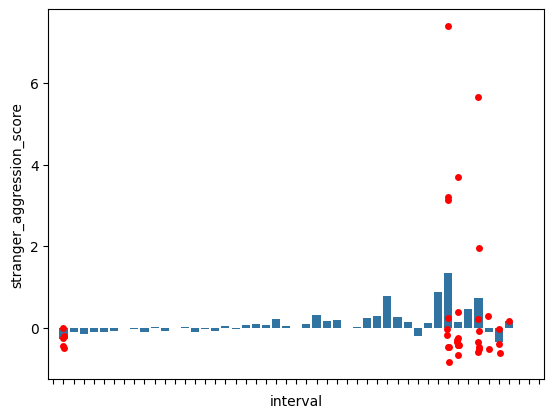

In [17]:
px.scatter(dogs, x='inattention_score', y='stranger_aggression_score').show()

A = pd.concat([dogs, pd.cut(dogs['inattention_score'], np.linspace(-2, 5, 50)).rename('interval')], axis=1)

B = A.groupby('interval')['stranger_aggression_score'].mean()
axe = sns.barplot(B)

C = pd.concat([A, A.groupby('interval')['stranger_aggression_score'].transform('count').rename('CCC')], axis=1)
axe = sns.stripplot(C.loc[C['CCC'] < 10], x='interval', y='stranger_aggression_score', color='red', ax=axe)
axe.set_xticklabels('')
pass

Nevyzera, ze by inattetion, impulsivity ma vplyv na agresiu voci ludom.

# Agresivita psa v zavislosti od chovatela

In [18]:
display(dogs.groupby('dog_breeder')['stranger_aggression_score'].mean())
display(Markdown('**Cize ludia, co chovaju psov maju skore s mensiou agresivitou**'))

dog_breeder
no     0.015339
yes   -0.110262
Name: stranger_aggression_score, dtype: float64

**Cize ludia, co chovaju psov maju skore s mensiou agresivitou**

In [19]:
A = dogs.groupby(['dog_breeder','dog_experience'])['stranger_aggression_score'].mean().reset_index()
A['dog_experience'] = pd.Categorical(A['dog_experience'], ['first_dog','second_dog','3-5th_dog','over_5th_dog'],ordered=True)
A = A.sort_values(by='dog_experience')
# display(A)
# display(dogs['stranger_aggression_score'].describe())

fig = px.bar(A, x='dog_experience', y='stranger_aggression_score', color='dog_breeder', barmode='group')
fig.show()

fig = px.bar(A, x='dog_experience', y='stranger_aggression_score', color='dog_breeder', barmode='group', title='Aggression score v plnom rozsahu')
fig.update_yaxes(range=[dogs['stranger_aggression_score'].min(), dogs['stranger_aggression_score'].max()])
fig.show()

Cim viacej psov chovatel mal, tak tym ma nizsiu aggresion score, zaroven, ak je majitel chovatel, tak mava nizsiu aggression score (zaujimavo okrem prveho psa). *Napriek tomu tie rozdielu su velmi male a mozno aj zanedbatelne*.

# Prepojenie medzi agresivitou a personality

# Prepojenie medzi stranger aggression score a aggresion stranges
Idealne by malo byt linearne

,count,mean,std,min,25%,50%,75%,max
aggression_strangers,,,,,,,,
0.0,10739.0,-0.170680,0.556920,-1.398677,-0.448774,-0.308473,-0.077117,6.514672
1.0,645.0,2.625214,2.189022,-1.408906,0.750656,2.354270,4.083572,8.162408


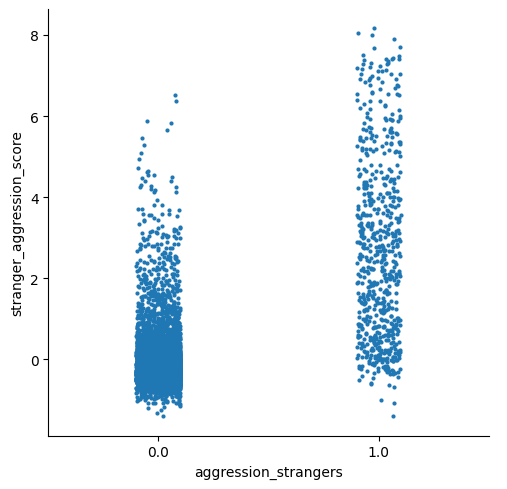

In [20]:
# dogs['aggression_strangers'] = dogs['aggression_strangers'].astype('category')
# px.scatter(dogs, y='stranger_aggression_score', x='aggression_strangers').show()
grid = sns.catplot(x="aggression_strangers", y="stranger_aggression_score", data=dogs, size=3)

display(dogs.groupby('aggression_strangers')['stranger_aggression_score'].describe())

# Rozdiel medzi agresivitou k cudzim ludom a agresivitou k majitelom